In [226]:
import pickle
import pandas as pd
import numpy as np
import math
import scipy.stats
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
with open('/Users/gefan/Downloads/MO_clean','rb') as handle1:
        MO = pickle.load(handle1)
with open('/Users/gefan/Downloads/JF_clean','rb') as handle2:
        JF = pickle.load(handle2)
poll = pd.read_csv('/Users/gefan/Downloads/poll.csv')

## Overview

In [227]:
MO_positive=[]
MO_negative=[]
MO_nonneg=[]
JF_positive=[]
JF_negative=[]
JF_nonneg=[]
MO_overall=[0,0,0]
JF_overall=[0,0,0]

In [228]:
for key in JF.keys():
    MO_positive.append(MO[key]['sentiment'].value_counts()['positive']/len(MO[key]))
    MO_negative.append(MO[key]['sentiment'].value_counts()['negative']/len(MO[key]))
    MO_nonneg.append((MO[key]['sentiment'].value_counts()['neutral']+MO[key]['sentiment'].value_counts()['positive'])/len(MO[key]))
    JF_positive.append(JF[key]['sentiment'].value_counts()['positive']/len(JF[key]))
    JF_negative.append(JF[key]['sentiment'].value_counts()['negative']/len(JF[key]))
    JF_nonneg.append((JF[key]['sentiment'].value_counts()['neutral']+JF[key]['sentiment'].value_counts()['positive'])/len(JF[key]))
    MO_overall[0]+=MO[key]['sentiment'].value_counts()['positive']
    MO_overall[1]+=MO[key]['sentiment'].value_counts()['neutral']
    MO_overall[2]+=MO[key]['sentiment'].value_counts()['negative']
    JF_overall[0]+=JF[key]['sentiment'].value_counts()['positive']
    JF_overall[1]+=JF[key]['sentiment'].value_counts()['neutral']
    JF_overall[2]+=JF[key]['sentiment'].value_counts()['negative']
    

In [229]:
positive = MO_overall[0]/sum(MO_overall)
neutral = MO_overall[1]/sum(MO_overall)
negative = MO_overall[2]/sum(MO_overall)

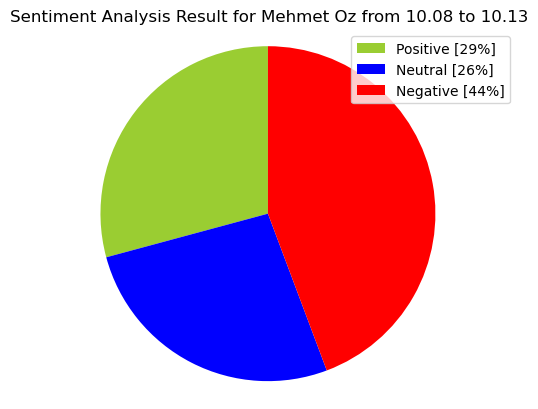

In [230]:
labels = ["Positive ["+str(int(positive*100))+"%]" , "Neutral ["+str(int(neutral*100))+"%]","Negative ["+str(int(negative*100))+"%]"]
sizes = [positive, neutral, negative]
colors = ["yellowgreen", "blue","red"]
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use("default")
plt.legend(labels)
plt.title("Sentiment Analysis Result for Mehmet Oz from 10.08 to 10.13" )
plt.axis("equal")
plt.show()

In [231]:
positive = JF_overall[0]/sum(JF_overall)
neutral = JF_overall[1]/sum(JF_overall)
negative = JF_overall[2]/sum(JF_overall)

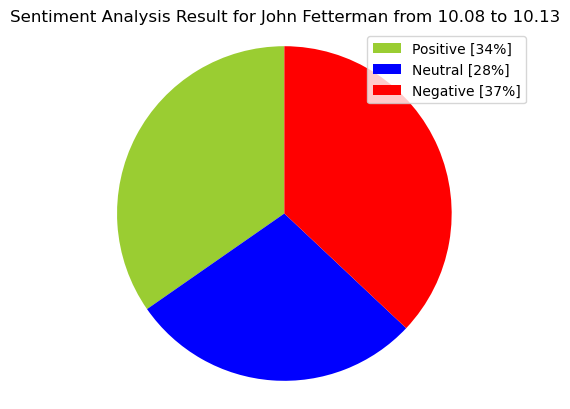

In [232]:
labels = ["Positive ["+str(int(positive*100))+"%]" , "Neutral ["+str(int(neutral*100))+"%]","Negative ["+str(int(negative*100))+"%]"]
sizes = [positive, neutral, negative]
colors = ["yellowgreen", "blue","red"]
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use("default")
plt.legend(labels)
plt.title("Sentiment Analysis Result for John Fetterman from 10.08 to 10.13" )
plt.axis("equal")
plt.show()

## Hypothesis 1&2 : poll trend is correlated with sentiment proportion trend
### First, for each candidate, a higher proportion of positive sentiment (e.g., JF’s positive tweets / JF’s total tweets) or non-negative sentiment is positively correlated with a higher poll number. Second, for each candidate, a higher proportion of negative sentiment is negatively correlated with a higher poll number.

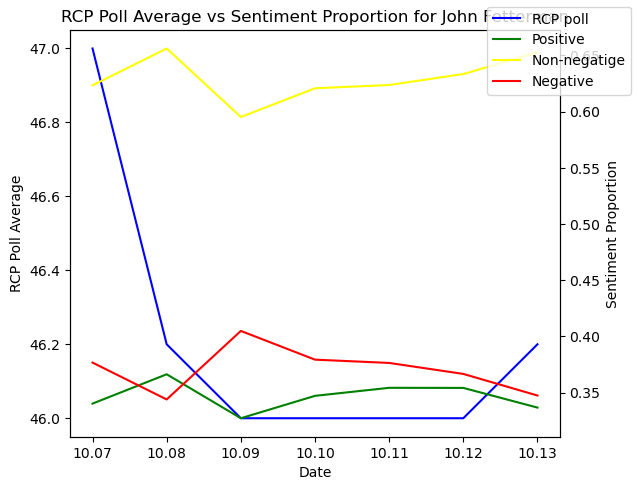

In [233]:
fig, ax1 = plt.subplots()
ax1.set_xlabel('Date')
ax1.set_ylabel('RCP Poll Average')
ax1.plot(poll['Date'], poll['JF'], color='blue',label = 'RCP poll')
ax2 = ax1.twinx()  
ax2.set_ylabel('Sentiment Proportion')  
ax2.plot(poll['Date'], JF_positive, color='green',label ='Positive')
ax2.plot(poll['Date'], JF_nonneg, color='yellow',label ='Non-negatige')
ax2.plot(poll['Date'], JF_negative, color='red',label ='Negative')
fig.tight_layout()
plt.title('RCP Poll Average vs Sentiment Proportion for John Fetterman')
fig.legend()
plt.show()

In [234]:
nonneg_cor = []
neg_cor = []

In [235]:
print("Lag "+str(0)+" correlation of poll with positive sentiment:",
          np.corrcoef(JF_positive, list(poll['JF']))[0][1])
print("Lag"+str(0)+" correlation of poll with non-negative sentiment:",
          np.corrcoef(JF_nonneg, list(poll['JF']))[0][1])
nonneg_cor.append(np.corrcoef(JF_nonneg, list(poll['JF']))[0][1])
print("Lag"+str(0)+" correlation of poll with negative sentiment:",
          np.corrcoef(JF_negative, list(poll['JF']))[0][1])
neg_cor.append(np.corrcoef(JF_negative, list(poll['JF']))[0][1])
print('----------------------------------------------------------------------')
for i in range(1,len(JF_positive)-3):
    print("Lag "+str(i)+" correlation of poll with positive sentiment:",
          np.corrcoef(JF_positive[:-i], list(poll['JF'][i:]))[0][1])
    print("Lag"+str(i)+" correlation of poll with non-negative sentiment:",
          np.corrcoef(JF_nonneg[:-i], list(poll['JF'][i:]))[0][1])
    nonneg_cor.append(np.corrcoef(JF_nonneg[:-i], list(poll['JF'][i:]))[0][1])
    print("Lag"+str(i)+" correlation of poll with negative sentiment:",
          np.corrcoef(JF_negative[:-i], list(poll['JF'][i:]))[0][1])
    neg_cor.append(np.corrcoef(JF_negative[:-i], list(poll['JF'][i:]))[0][1])
    print('----------------------------------------------------------------------')

Lag 0 correlation of poll with positive sentiment: -0.15329930483359747
Lag0 correlation of poll with non-negative sentiment: 0.08990819375941599
Lag0 correlation of poll with negative sentiment: -0.08990819375941572
----------------------------------------------------------------------
Lag 1 correlation of poll with positive sentiment: -0.05881447249460004
Lag1 correlation of poll with non-negative sentiment: 0.11675211815010994
Lag1 correlation of poll with negative sentiment: -0.11675211815010958
----------------------------------------------------------------------
Lag 2 correlation of poll with positive sentiment: 0.27547753430371924
Lag2 correlation of poll with non-negative sentiment: -0.004101619523437578
Lag2 correlation of poll with negative sentiment: 0.004101619523437858
----------------------------------------------------------------------
Lag 3 correlation of poll with positive sentiment: 0.07807636221965797
Lag3 correlation of poll with non-negative sentiment: -0.0831013

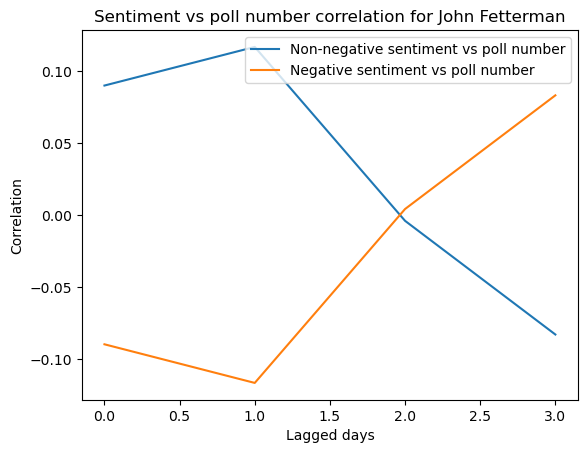

In [236]:
plt.plot(range(len(nonneg_cor)),nonneg_cor, label = 'Non-negative sentiment vs poll number')
plt.plot(range(len(neg_cor)),neg_cor, label = 'Negative sentiment vs poll number' )
plt.xlabel('Lagged days')
plt.ylabel('Correlation')
plt.title('Sentiment vs poll number correlation for John Fetterman')
plt.legend()
plt.show()

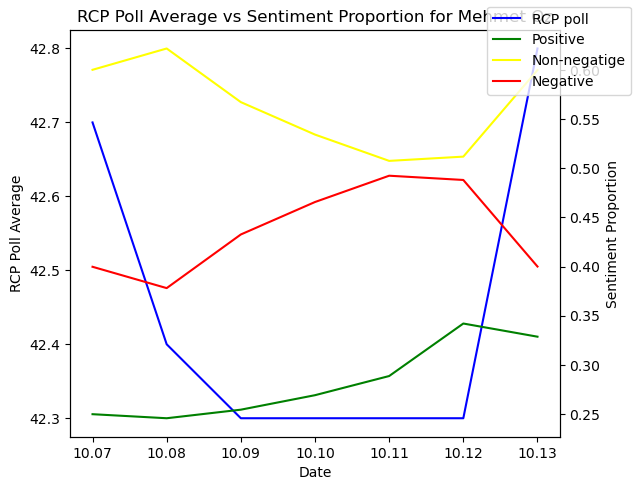

In [237]:
fig, ax1 = plt.subplots()
ax1.set_xlabel('Date')
ax1.set_ylabel('RCP Poll Average')
ax1.plot(poll['Date'], poll['MO'], color='blue',label = 'RCP poll')
ax2 = ax1.twinx()  
ax2.set_ylabel('Sentiment Proportion')  
ax2.plot(poll['Date'], MO_positive, color='green',label ='Positive')
ax2.plot(poll['Date'], MO_nonneg, color='yellow',label ='Non-negatige')
ax2.plot(poll['Date'], MO_negative, color='red',label ='Negative')
fig.tight_layout()
plt.title('RCP Poll Average vs Sentiment Proportion for Mehmet Oz')
fig.legend()
plt.show()

In [238]:
nonneg_cor = []
neg_cor = []

In [239]:
print("Lag "+str(0)+" correlation of poll with positive sentiment:",
          np.corrcoef(MO_positive, list(poll['MO']))[0][1])
print("Lag"+str(0)+" correlation of poll with non-negative sentiment:",
          np.corrcoef(MO_nonneg, list(poll['MO']))[0][1])
nonneg_cor.append(np.corrcoef(MO_nonneg, list(poll['MO']))[0][1])
print("Lag"+str(0)+" correlation of poll with negative sentiment:",
          np.corrcoef(MO_negative, list(poll['MO']))[0][1])
neg_cor.append(np.corrcoef(MO_negative, list(poll['MO']))[0][1])
print('----------------------------------------------------------------------')
for i in range(1,len(MO_positive)-3):
    print("Lag "+str(i)+" correlation of poll with positive sentiment:",
          np.corrcoef(MO_positive[:-i], list(poll['MO'][i:]))[0][1])
    print("Lag"+str(i)+" correlation of poll with non-negative sentiment:",
          np.corrcoef(MO_nonneg[:-i], list(poll['MO'][i:]))[0][1])
    nonneg_cor.append(np.corrcoef(MO_nonneg[:-i], list(poll['MO'][i:]))[0][1])
    print("Lag"+str(i)+" correlation of poll with negative sentiment:",
          np.corrcoef(MO_negative[:-i], list(poll['MO'][i:]))[0][1])
    neg_cor.append(np.corrcoef(MO_negative[:-i], list(poll['MO'][i:]))[0][1])
    print('----------------------------------------------------------------------')

Lag 0 correlation of poll with positive sentiment: 0.12329929780943748
Lag0 correlation of poll with non-negative sentiment: 0.6551770812508504
Lag0 correlation of poll with negative sentiment: -0.6551770812508507
----------------------------------------------------------------------
Lag 1 correlation of poll with positive sentiment: 0.8519865489762254
Lag1 correlation of poll with non-negative sentiment: -0.38820202508625584
Lag1 correlation of poll with negative sentiment: 0.38820202508625584
----------------------------------------------------------------------
Lag 2 correlation of poll with positive sentiment: 0.863304835774577
Lag2 correlation of poll with non-negative sentiment: -0.7029939487986061
Lag2 correlation of poll with negative sentiment: 0.7029939487986062
----------------------------------------------------------------------
Lag 3 correlation of poll with positive sentiment: 0.9375644973225253
Lag3 correlation of poll with non-negative sentiment: -0.8108680676786983
La

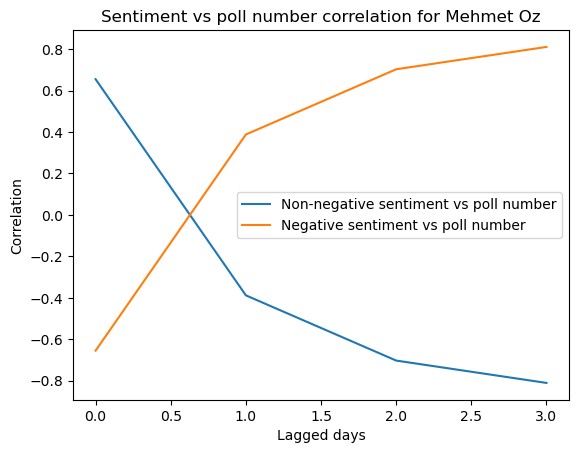

In [240]:
plt.plot(range(len(nonneg_cor)),nonneg_cor, label = 'Non-negative sentiment vs poll number')
plt.plot(range(len(neg_cor)),neg_cor, label = 'Negative sentiment vs poll number' )
plt.xlabel('Lagged days')
plt.ylabel('Correlation')
plt.title('Sentiment vs poll number correlation for Mehmet Oz')
plt.legend()
plt.show()

## Hypothesis 3&4: poll spread is correlated with proportion of sentiments spread
### Third, for the two candidates, a higher positive sentiment proportion spread (e.g., JF’s positive tweets / JF’s total tweets - MO’s positive tweets / MO’s total tweets) or non-negative sentiment proportion spread is positively correlated with a higher poll number spread (JF’s RCP poll average - MO’s RCP poll average). Fourth, for the two candidates, a higher negative sentiment proportion spread is negatively correlated with a higher poll number spread. 

In [241]:
positive_spd = [JF_positive[i]-MO_positive[i] for i in range(len(JF_positive))]
nonneg_spd = [JF_nonneg[i]-MO_nonneg[i] for i in range(len(JF_nonneg))]
negative_spd = [JF_negative[i]-MO_negative[i] for i in range(len(JF_negative))]
poll_spd = [poll['JF'][i]-poll['MO'][i] for i in range(len(JF_negative))]

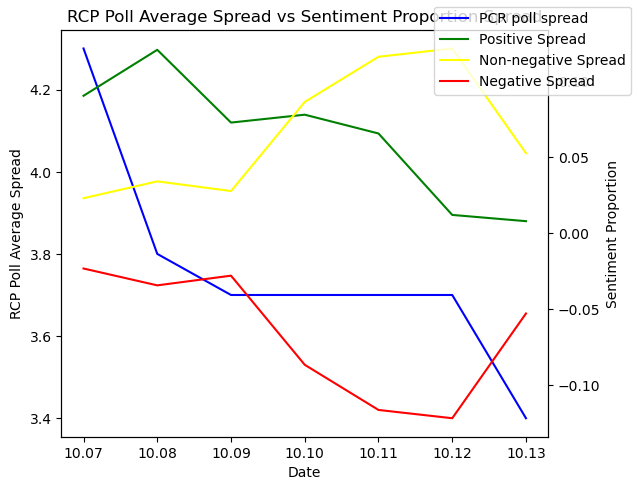

In [249]:
fig, ax1 = plt.subplots()
ax1.set_xlabel('Date')
ax1.set_ylabel('RCP Poll Average Spread')
ax1.plot(poll['Date'], poll_spd, color='blue',label = 'PCR poll spread')
ax2 = ax1.twinx()  
ax2.set_ylabel('Sentiment Proportion')  
ax2.plot(poll['Date'], positive_spd, color='green',label ='Positive Spread')
ax2.plot(poll['Date'], nonneg_spd, color='yellow',label ='Non-negative Spread')
ax2.plot(poll['Date'], negative_spd, color='red',label ='Negative Spread')
fig.tight_layout()
plt.title('RCP Poll Average Spread vs Sentiment Proportion Spread')
fig.legend()
plt.show()

In [250]:
pos_cor = []
neg_cor = []

In [247]:
print("Lag "+str(0)+" correlation of poll with positive sentiment:",
          np.corrcoef(positive_spd, poll_spd)[0][1])
pos_cor.append(np.corrcoef(positive_spd, poll_spd)[0][1])
print("Lag"+str(0)+" correlation of poll with non-negative sentiment:",
          np.corrcoef(nonneg_spd, poll_spd)[0][1])
print("Lag"+str(0)+" correlation of poll with negative sentiment:",
          np.corrcoef(negative_spd, poll_spd)[0][1])
neg_cor.append(np.corrcoef(negative_spd, poll_spd)[0][1])
print('----------------------------------------------------------------------')
for i in range(1,len(positive_spd)-3):
    print("Lag "+str(i)+" correlation of poll with positive sentiment:",
          np.corrcoef(positive_spd[:-i], poll_spd[i:])[0][1])
    pos_cor.append(np.corrcoef(positive_spd[:-i], poll_spd[i:])[0][1])
    print("Lag"+str(i)+" correlation of poll with non-negative sentiment:",
          np.corrcoef(nonneg_spd[:-i], poll_spd[i:])[0][1])
    print("Lag"+str(i)+" correlation of poll with negative sentiment:",
          np.corrcoef(negative_spd[:-i], poll_spd[i:])[0][1])
    neg_cor.append(np.corrcoef(negative_spd[:-i], poll_spd[i:])[0][1])
    print('----------------------------------------------------------------------')

Lag 0 correlation of poll with positive sentiment: 0.5795880979118404
Lag0 correlation of poll with non-negative sentiment: -0.3676944537698405
Lag0 correlation of poll with negative sentiment: 0.36769445376984056
----------------------------------------------------------------------
Lag 1 correlation of poll with positive sentiment: 0.8235435910643579
Lag1 correlation of poll with non-negative sentiment: -0.6618469204123572
Lag1 correlation of poll with negative sentiment: 0.661846920412357
----------------------------------------------------------------------
Lag 2 correlation of poll with positive sentiment: 0.5134270423260795
Lag2 correlation of poll with non-negative sentiment: -0.7896735411130981
Lag2 correlation of poll with negative sentiment: 0.7896735411130977
----------------------------------------------------------------------
Lag 3 correlation of poll with positive sentiment: 0.3880653215470603
Lag3 correlation of poll with non-negative sentiment: -0.9879858035116833
Lag3

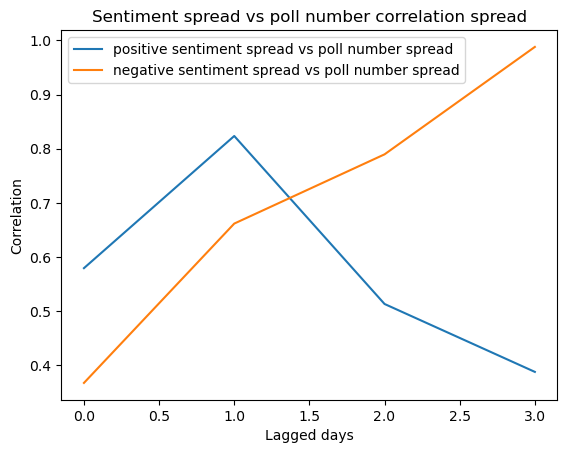

In [248]:
plt.plot(range(len(pos_cor)),pos_cor, label = 'positive sentiment spread vs poll number spread')
plt.plot(range(len(neg_cor)),neg_cor, label = 'negative sentiment spread vs poll number spread')
plt.xlabel('Lagged days')
plt.ylabel('Correlation')
plt.title('Sentiment spread vs poll number correlation spread')
plt.legend()
plt.show()